# Tanzania Wells Analysis
## by Allison Ward, Sarah Prusaitis, and Monica Pecha

Business problem: A theoretical NGO is looking to asses the condition of hand pump and communal standpipe wells in the Lake Victoria basin. They have requested that we help them predict the likelihood of a well being functional or nonfunctional so that they can identify the wells in disrepair and fix them and/or build new ones. 

The dataset was taken from [DrivenData](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/), supplied by [Taarifa](https://taarifa.org/) and the [Tanzanian Ministry of Water](https://www.maji.go.tz/). 

Initial BLUF: Communal standpipe wells are more likely to be in need of repair
Wells with surface water as a source are more likely to be in need of repair
Mwanza is a region to learn from

# Exploratory Data Analysis (EDA)

## Part 1 - Initial EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import seaborn.objects as so

%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.impute import MissingIndicator, SimpleImputer

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

import scipy.stats as stats
from scipy.stats import chi2_contingency

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

In [3]:
# Reading in our datasets to explore
df1 = pd.read_csv('data/test_set_values.csv')
df2= pd.read_csv('data/training_set_labels.csv')
df3 = pd.read_csv('data/training_set_values.csv')

In [4]:
df1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [6]:
df2.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [8]:
df3.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


After looking at the data, we decided to merge dataframes 2 and 3, which include the independent and dependent variables that were provided as training materials. 

In [9]:
# merging dataframes 2 and 3 on id
df4 = df3.merge(df2, on = "id")
df4.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Next, we dropped the columns that were duplicates of other columns or otherwise not relevant to the scope of our analysis. We also filtered the data for wells in the Lake Victoria basin that were eight communal standpipe wells or hand pump wells, as per the business problem.

In [10]:
# dropping irrelevant columns
to_drop = ["scheme_name", "id", "public_meeting", "payment_type", "ward", "management", "water_quality", "wpt_name", "installer", "funder", "source_type", "subvillage", "extraction_type", "extraction_type_group", "source", "scheme_management", "construction_year", "quantity_group", "waterpoint_type", "amount_tsh", "region_code", "district_code", "num_private", "date_recorded", "recorded_by"]
df4.drop(to_drop, axis=1, inplace = True)

In [11]:
# dropping any wells that are not located in the Lake Victoria basin (our stakeholder wants to focus on one region)
df4.drop(df4.index[df4['basin'] != 'Lake Victoria'], inplace = True)
df4.head()

,gps_height,longitude,latitude,basin,region,lga,population,permit,extraction_type_class,management_group,payment,quality_group,quantity,source_class,waterpoint_type_group,status_group
1,1399,34.698766,-2.147466e+00,Lake Victoria,Mara,Serengeti,280,True,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,functional
4,0,31.130847,-1.825359e+00,Lake Victoria,Kagera,Karagwe,0,True,gravity,other,never pay,good,seasonal,surface,communal standpipe,functional
9,0,30.626991,-1.257051e+00,Lake Victoria,Kagera,Karagwe,0,True,handpump,user-group,never pay,good,enough,groundwater,hand pump,functional
18,1162,32.920154,-1.947868e+00,Lake Victoria,Mwanza,Ukerewe,1000,True,other,user-group,never pay,milky,insufficient,groundwater,other,functional needs repair
21,0,0.000000,-2.000000e-08,Lake Victoria,Shinyanga,Bariadi,0,False,handpump,user-group,unknown,unknown,unknown,groundwater,hand pump,functional


In [12]:
# dropping any wells that are not a communal standpipe or hand pump
filtered_df = df4[df4['waterpoint_type_group'].isin(['communal standpipe', 'hand pump'])]

In [13]:
# renaming the column "status_group" to "target"
filtered_df.rename(columns={"status_group": "target"}, inplace= True)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8330 entries, 1 to 59385
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             8330 non-null   int64  
 1   longitude              8330 non-null   float64
 2   latitude               8330 non-null   float64
 3   basin                  8330 non-null   object 
 4   region                 8330 non-null   object 
 5   lga                    8330 non-null   object 
 6   population             8330 non-null   int64  
 7   permit                 7987 non-null   object 
 8   extraction_type_class  8330 non-null   object 
 9   management_group       8330 non-null   object 
 10  payment                8330 non-null   object 
 11  quality_group          8330 non-null   object 
 12  quantity               8330 non-null   object 
 13  source_class           8330 non-null   object 
 14  waterpoint_type_group  8330 non-null   object 
 15  tar

C:\Users\monic\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [14]:
# changing any row that says "functional needs repair" to "non functional"
filtered_df['target'].replace("functional needs repair", "non functional", inplace=True)

C:\Users\monic\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [15]:
# dropping nulls in the 'permit' column
fdf = filtered_df.dropna(subset=['permit'])

In [16]:
# resetting the index on our new dataframe
fdf.reset_index()

,index,gps_height,longitude,latitude,basin,region,lga,population,permit,extraction_type_class,management_group,payment,quality_group,quantity,source_class,waterpoint_type_group,target
0,1,1399,34.698766,-2.147466e+00,Lake Victoria,Mara,Serengeti,280,True,gravity,user-group,never pay,good,insufficient,surface,communal standpipe,functional
1,4,0,31.130847,-1.825359e+00,Lake Victoria,Kagera,Karagwe,0,True,gravity,other,never pay,good,seasonal,surface,communal standpipe,functional
2,9,0,30.626991,-1.257051e+00,Lake Victoria,Kagera,Karagwe,0,True,handpump,user-group,never pay,good,enough,groundwater,hand pump,functional
3,21,0,0.000000,-2.000000e-08,Lake Victoria,Shinyanga,Bariadi,0,False,handpump,user-group,unknown,unknown,unknown,groundwater,hand pump,functional
4,27,0,31.104257,-1.735361e+00,Lake Victoria,Kagera,Karagwe,0,True,handpump,user-group,never pay,good,enough,groundwater,hand pump,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,59371,0,33.586406,-3.040369e+00,Lake Victoria,Shinyanga,Maswa,0,False,handpump,user-group,never pay,good,enough,groundwater,hand pump,non functional
7983,59374,0,0.000000,-2.000000e-08,Lake Victoria,Shinyanga,Bariadi,0,False,handpump,user-group,other,good,enough,groundwater,hand pump,functional
7984,59379,0,31.613284,-1.820226e+00,Lake Victoria,Kagera,Muleba,0,True,gravity,user-group,never pay,good,enough,groundwater,communal standpipe,functional
7985,59384,0,30.667805,-2.483710e+00,Lake Victoria,Kagera,Ngara,0,False,gravity,user-group,never pay,good,insufficient,groundwater,communal standpipe,non functional


In [17]:
# dropping the column 'basin' since we filtered for only datapoints in the Lake Victoria basin
fdf.drop(['basin'], axis=1, inplace = True)
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7987 entries, 1 to 59385
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gps_height             7987 non-null   int64  
 1   longitude              7987 non-null   float64
 2   latitude               7987 non-null   float64
 3   region                 7987 non-null   object 
 4   lga                    7987 non-null   object 
 5   population             7987 non-null   int64  
 6   permit                 7987 non-null   object 
 7   extraction_type_class  7987 non-null   object 
 8   management_group       7987 non-null   object 
 9   payment                7987 non-null   object 
 10  quality_group          7987 non-null   object 
 11  quantity               7987 non-null   object 
 12  source_class           7987 non-null   object 
 13  waterpoint_type_group  7987 non-null   object 
 14  target                 7987 non-null   object 
dtypes: 

C:\Users\monic\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
# uploaded this to a new csv to use in Tableau
fdf.to_csv('df_v2.csv')

In [19]:
# # checking out value counts for our target variable
fdf['target'].value_counts()

functional        4342
non functional    3645
Name: target, dtype: int64

In [21]:
# looking for correlations in our numeric variables
#fdf.corr(method='pearson', numeric_only=True)

In [22]:
# we are assuming this is in meters, however the data dictionary does not specify
fdf['gps_height'].value_counts().head()

0       6191
1161      15
1178      13
1162      13
1142      13
Name: gps_height, dtype: int64

In [23]:
fdf['gps_height'].describe()

count    7987.000000
mean      297.158257
std       557.431169
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2056.000000
Name: gps_height, dtype: float64

In [24]:
fdf['region'].value_counts()

Mwanza       2389
Kagera       2289
Shinyanga    1896
Mara         1381
Arusha         32
Name: region, dtype: int64

In [25]:
fdf['population'].describe()

count    7987.000000
mean      111.776261
std       359.658720
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      6800.000000
Name: population, dtype: float64

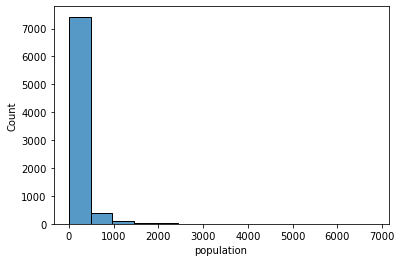

In [26]:
# histgram of population - most wells are located in areas with populations on 0
sns.histplot(fdf, x='population');

In [29]:
# comparing our target by region

#makes the plot bigger
#so.Plot.config.display["scaling"] = 1.25

# the plot
#so.Plot(fdf, x="region", color="target").add(so.Bar(), so.Count(), so.Stack())

In [30]:
# stands for Local Government Authorities (LGAs) in Tanzania are accountable for the delivery of public services to citizens - 
# providing oversight and management support to health facilities, schools, and villages (https://www.usaid.gov/sites/default/files/2022-05/PS3_Case_Brief_-_LGA.pdf)
fdf['lga'].value_counts()

Bariadi            1078
Karagwe             695
Magu                597
Kwimba              564
Ngara               463
Maswa               449
Musoma Rural        367
Geita               350
Bukoba Rural        348
Serengeti           342
Bunda               321
Sengerema           294
Missungwi           255
Muleba              232
Chato               210
Ukerewe             209
Misenyi             206
Rorya               192
Tarime              159
Shinyanga Rural     146
Meatu               137
Ilemela             119
Kahama               80
Biharamulo           77
Bukoba Urban         58
Ngorongoro           32
Kishapu               6
Nyamagana             1
Name: lga, dtype: int64

In [31]:
# comparing our target by extraction type
#so.Plot(fdf, y="extraction_type_class", color="target").add(so.Bar(), so.Count(), so.Stack())

In [32]:
# comparing payment method and target
#so.Plot(fdf, y="payment", color="target").add(so.Bar(), so.Count(), so.Stack())

In [33]:
# comparing waterpoint type and target
#so.Plot(fdf, x="waterpoint_type_group", color="target").add(so.Bar(), so.Count(), so.Stack())

## Part 2 - Statistical Analysis

After our initial EDA, we decided to perform some statistical tests to see if any of our variables are highly correlated. Since we are comparing categorical variables, we decided to use a Chi-Squared test of independence. 

In [34]:
# comparing extraction type and source
homogeneity_table1 = pd.crosstab(fdf["extraction_type_class"], fdf["source_class"])
homogeneity_table1

source_class,groundwater,surface,unknown
extraction_type_class,,,
gravity,1045,927,3
handpump,4829,10,2
motorpump,174,105,1
other,127,155,6
rope pump,88,3,1
submersible,200,309,0
wind-powered,1,1,0


In [35]:
# performing chi-squared
chi2, p, dof, ex = stats.chi2_contingency(homogeneity_table1)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 3088.1263145516186
p-value: 0.0


In [36]:
# comparing waterpoint type and source class
homogeneity_table2 = pd.crosstab(fdf["waterpoint_type_group"], fdf["source_class"])
homogeneity_table2

source_class,groundwater,surface,unknown
waterpoint_type_group,,,
communal standpipe,1473,1486,5
hand pump,4991,24,8


In [37]:
# performing chi-squared
chi2, p, dof, ex = stats.chi2_contingency(homogeneity_table2)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 2999.4083358133803
p-value: 0.0


In [38]:
# comparing extraction type and source
homogeneity_table3 = pd.crosstab(fdf["extraction_type_class"], fdf["source_class"])
homogeneity_table3

source_class,groundwater,surface,unknown
extraction_type_class,,,
gravity,1045,927,3
handpump,4829,10,2
motorpump,174,105,1
other,127,155,6
rope pump,88,3,1
submersible,200,309,0
wind-powered,1,1,0


In [39]:
# performing chi-squared
chi2, p, dof, ex = stats.chi2_contingency(homogeneity_table3)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 3088.1263145516186
p-value: 0.0


In [40]:
# comparing extraction type and waterpoint type
homogeneity_table4 = pd.crosstab(fdf["extraction_type_class"], fdf["waterpoint_type_group"])
homogeneity_table4

waterpoint_type_group,communal standpipe,hand pump
extraction_type_class,,
gravity,1952,23
handpump,36,4805
motorpump,278,2
other,168,120
rope pump,25,67
submersible,503,6
wind-powered,2,0


In [41]:
# performing chi-squared
chi2, p, dof, ex = stats.chi2_contingency(homogeneity_table4)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 7324.637091891358
p-value: 0.0


# Performing Train-Test Split

After our EDA was complete, we split the data into a training and testing set to make sure there is no data leakage. This was before performing any preprocessing steps. 

We determined, using domain knowledge, that latitude, longitude, and gps height (aka altitude) would be highly multicolinear, and therefore should be left out of our training and testing data. 

In [42]:
# train-test split

X = fdf.drop(["target", "latitude", "longitude", "gps_height"], axis=1)
y = fdf["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
# checking the shapes to make sure they look correct
X_train.shape

(5990, 11)

In [44]:
# checking the shapes to make sure they look correct
y_train.shape

(5990,)

In [45]:
# checking the shapes to make sure they look correct
X_test.shape

(1997, 11)

In [46]:
# checking the shapes to make sure they look correct
y_test.shape

(1997,)

In [47]:
X_train.head()

,region,lga,population,permit,extraction_type_class,management_group,payment,quality_group,quantity,source_class,waterpoint_type_group
33838,Mwanza,Missungwi,0,True,handpump,user-group,pay annually,good,seasonal,groundwater,hand pump
21716,Kagera,Misenyi,0,True,handpump,user-group,never pay,good,insufficient,groundwater,hand pump
15291,Shinyanga,Maswa,0,False,handpump,user-group,never pay,good,enough,groundwater,hand pump
5048,Shinyanga,Maswa,0,False,gravity,user-group,pay per bucket,good,enough,groundwater,communal standpipe
22750,Kagera,Ngara,0,False,gravity,user-group,pay per bucket,good,enough,groundwater,communal standpipe


# Preprocessing

Our first preprocessing step was performing One Hot Encoding on our variables. Since all of our remaining variables are categorical, and we are not missing any values, this was relatively straightforward. 

In [48]:
# isolating categorical columns
cat_columns = X_train[['region', 'lga', 'permit', 'extraction_type_class', 'management_group', 'payment', 'quality_group', 'source_class', 'waterpoint_type_group']].copy()

# instantiate the OneHotEncoder
ohe = OneHotEncoder(drop='first')

# fit the ohe on our training set
ohe.fit(cat_columns)

# transform columns and convert our encoded matrix back into a dataframe
X_train_encoded_cats = pd.DataFrame(ohe.transform(cat_columns).todense(),
                               columns=ohe.get_feature_names_out())

X_train_encoded_cats.head()

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names_out'

In [ ]:
# Reset the index of X_train numeric columns and X_train encoded categorical variables
X_train_num_reset = X_train['population'].reset_index(drop=True)
X_train_encoded_cats_reset = X_train_encoded_cats.reset_index(drop=True)

# Concatenate the two dataframes
X_train_encoded = pd.concat([X_train_num_reset, X_train_encoded_cats_reset], axis=1)

# checking our work
X_train_encoded.info()

# Baseline (Dummy) Model

After performing our preprocessing, we performed a baseline model using SKLearn's Dummy Classifier to determine the value of our target that appears most frequently. 

In [ ]:
# Instantiate the model
dummy_model = DummyClassifier(strategy="most_frequent")

# fitting the model to our newly encoded dataset
dummy_model.fit(X_train_encoded, y_train)

# predicting the first 10
dummy_model.predict(X_train_encoded)[:10]

In [ ]:
# transforming the test set with our encoded variables, making sure to TRANSFORM but NOT FIT to the test group
#cat_columns2 = X_test[['region', 'lga', 'permit', 'extraction_type_class', 'management_group', 'payment', 'quality_group', 'source_class', 'waterpoint_type_group']].copy()

#X_test_encoded_cats = pd.DataFrame(ohe.transform(cat_columns2).todense(),
#                               columns=ohe.get_feature_names_out())

#X_test_encoded_cats = ohe.transform(cat_columns2)

#X_train_encoded_cats

# Preliminary Model 1

In order to further determine which predictors of our target are the strongest, we used a Decision Tree Classifier.

In [ ]:
# instantiate tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# fit to our training set
tree.fit(X_train_encoded, y_train)

# plotting the figure
plt.figure(figsize=(20,15))  # set plot size (denoted in inches)
plot_tree(tree, fontsize=10)
plt.show();

In [ ]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_encoded)

In [ ]:
log = LogisticRegression(random_state=42)
log.fit(X_train_sc, y_train)

In [ ]:
y_predict = log.predict(X_train_sc)
y_predict

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_train, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

training_accuracy = accuracy_score(y_train, y_predict)
training_accuracy

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_predict))

In [ ]:
X_train2 = X_train_encoded[['waterpoint_type_group_hand pump', 'management_group_user-group', 'extraction_type_class_other']]
X_train2.head()

In [ ]:
log = LogisticRegression(random_state=42)
log.fit(X_train2, y_train)
y_predict2 = log.predict(X_train2)
y_predict2

In [ ]:
print(classification_report(y_train, y_predict2))

In [ ]:
X_train3 = X_train_encoded[['region_Mwanza', 'payment_pay annually', 'lga_Biharamulo', 'lga_Bunda']]
X_train3.head()

In [ ]:
log = LogisticRegression(random_state=42)
log.fit(X_train3, y_train)
y_predict3 = log.predict(X_train3)
y_predict3

In [ ]:
print(classification_report(y_train, y_predict3))

In [ ]:
X_train4 = X_train_encoded.loc[:, ~X_train_encoded.columns.str.contains('lga')]
X_train4.info()

In [ ]:
X_train4['management_group_user-group'].value_counts()

In [ ]:
X_train4['quality_group_milky'].value_counts()

In [ ]:
X_train4['quality_group_fluoride'].value_counts()

In [ ]:
X_train4['quality_group_salty'].value_counts()

In [ ]:
X_train4['quality_group_good'].value_counts()

In [ ]:
X_train4['quality_group_unknown'].value_counts()

In [ ]:
X_train4['payment_pay when scheme fails'].value_counts()

In [ ]:
X_train4['payment_other'].value_counts()

# Preliminary Model 2

In [ ]:
# instantiate tree
tree = DecisionTreeClassifier(max_depth=4, random_state=42)

# fit to our training set
tree.fit(X_train4, y_train)

# plotting the figure
plt.figure(figsize=(20,15))  # set plot size (denoted in inches)
plot_tree(tree, fontsize=10)
plt.show();

# Feature Selection Part 2

In [ ]:
X_train.info()

In [ ]:
to_drop2 = ['population', 'lga', 'permit', 'quantity']
X_trainV2 = X_train.drop(labels= to_drop2, axis=1)
X_trainV2.info()

In [ ]:
X_trainV2['extraction_type_class'].value_counts()

In [ ]:
X_trainV2['extraction_type_class'].replace("handpump", "manual", inplace=True)
X_trainV2['extraction_type_class'].replace("gravity", "other", inplace=True)
X_trainV2['extraction_type_class'].replace("submersible", "mechanical", inplace=True)
X_trainV2['extraction_type_class'].replace("motorpump", "mechanical", inplace=True)
X_trainV2['extraction_type_class'].replace("rope pump", "manual", inplace=True)
X_trainV2['extraction_type_class'].replace("wind-powered", "other", inplace=True)
X_trainV2['extraction_type_class'].value_counts()

In [ ]:
X_trainV2['quality_group'].value_counts()

In [ ]:
X_trainV2['quality_group'].replace("salty", "other", inplace=True)
X_trainV2['quality_group'].replace("milky", "other", inplace=True)
X_trainV2['quality_group'].replace("colored", "other", inplace=True)
X_trainV2['quality_group'].replace("fluoride", "other", inplace=True)
X_trainV2['quality_group'].value_counts()

In [ ]:
X_trainV2['payment'].value_counts()

In [ ]:
X_trainV2['payment'].replace("pay when scheme fails", "other", inplace=True)
X_trainV2['payment'].replace("pay monthly", "other", inplace=True)
X_trainV2['payment'].replace("pay per bucket", "other", inplace=True)
X_trainV2['payment'].replace("pay annually", "other", inplace=True)
X_trainV2['payment'].value_counts()

In [ ]:
X_trainV2.info()

In [ ]:
ohe = OneHotEncoder(drop='first')

# fit the ohe on our training set
ohe.fit(X_trainV2)

# transform columns and convert our encoded matrix back into a dataframe
X_trainV2_encoded = pd.DataFrame(ohe.transform(X_trainV2).todense(),
                               columns=ohe.get_feature_names_out())

X_trainV2_encoded.info()

# Preliminary Model 3

In [ ]:
# instantiate tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)

# fit to our training set
tree.fit(X_trainV2_encoded, y_train)

# plotting the figure
plt.figure(figsize=(20,15))  # set plot size (denoted in inches)
plot_tree(tree, fontsize=10)
plt.show();

In [ ]:
log = LogisticRegression(random_state=42)
log.fit(X_trainV2_encoded, y_train)
y_predictV2 = log.predict(X_trainV2_encoded)
y_predictV2

In [ ]:
cm = confusion_matrix(y_train, y_predictV2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train, y_predictV2))

In [ ]:
subset = X_trainV2_encoded[['extraction_type_class_mechanical', 'extraction_type_class_other', 'management_group_other', 'management_group_parastatal', 'management_group_unknown', 'management_group_user-group', 'waterpoint_type_group_hand pump']]
subset.info()

In [ ]:
log = LogisticRegression(random_state=42)
log.fit(subset, y_train)
y_pred_sub = log.predict(subset)
y_pred_sub

In [ ]:
cm = confusion_matrix(y_train, y_pred_sub)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_train, y_pred_sub))